# Introduction to Linear Regression
This notebook provides a condensed summary of key concepts from an introduction to linear regression. Each section explains the theory of modeling relationships between quantitative variables and includes short Python examples, such as predicting NYC rental prices from apartment size or estimating adult height from a parent’s height.

## Linear Regression Basics
Linear regression relies on fitting a line to data points, which is expressed with the equation y = mx + b. In this form, x and y are variables of interest, m represents the slope, and b the y-intercept. The slope measures how steep the line is and is calculated as the ratio of vertical to horizontal change (rise/run). A positive slope indicates that y increases as x increases, while a negative slope indicates the opposite. The y-intercept is the point where the line crosses the y-axis and determines the vertical position of the line. Adjusting the slope changes the steepness, and shifting the intercept moves the line up or down, both of which are key steps when fitting a regression line to data.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
students = pd.read_csv('test_data.csv')

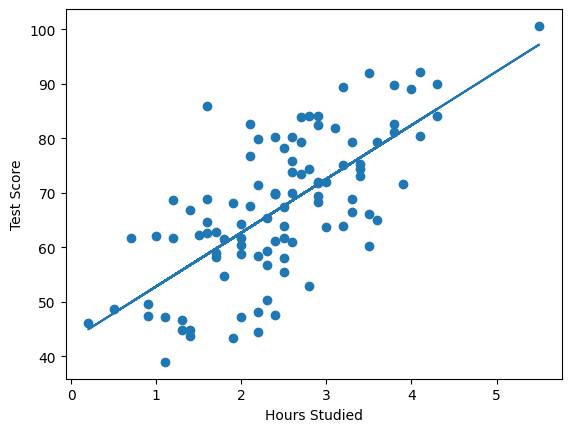

In [2]:
# Write equation for a line
y = 9.85 * students.hours_studied + 43

# Create the plot here: 
plt.scatter(students.hours_studied, students.score)
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')

plt.plot(students.hours_studied, y)
plt.show()

## Equation of a Line
Linear regression relies on fitting a line to data points, which is expressed with the equation y = mx + b. In this form, x and y are variables of interest, m represents the slope, and b the y-intercept. The slope measures how steep the line is and is calculated as the ratio of vertical to horizontal change (rise/run). A positive slope indicates that y increases as x increases, while a negative slope indicates the opposite. The y-intercept is the point where the line crosses the y-axis and determines the vertical position of the line. Adjusting the slope changes the steepness, and shifting the intercept moves the line up or down, both of which are key steps when fitting a regression line to data.

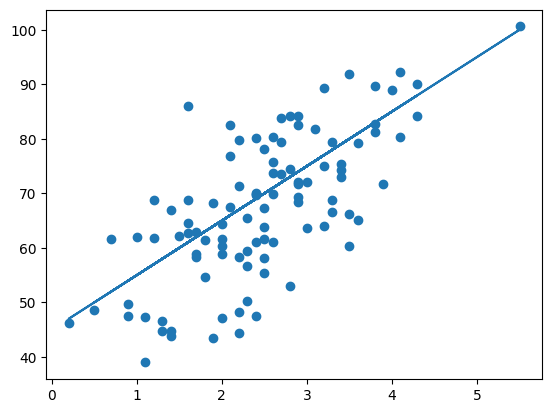

In [3]:
# You can change the values of the slope and intercept to find the best fitting line
slope = 10
intercept = 45
predicted_score = slope * students.hours_studied + intercept

# Create the plot
plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, predicted_score)
plt.show()

## Finding the "Best" Line

To determine the best-fit line in linear regression, we need a clear criterion for what “best” means. A common approach is ordinary least squares (OLS), which models the relationship as y = mx + b + error. The “best” line is the one that minimizes the total squared error between observed data points and predicted values, known as the loss function. Squaring the errors ensures that deviations above and below the line contribute equally to the total loss. By adjusting the slope and intercept to minimize this loss, OLS identifies the optimal line that best represents the data.

Depending on our ultimate goals and data, we might choose different criteria; however, a common choice for linear regression is ordinary least squares (OLS). In simple OLS regression, we assume that the relationship between two variables x and y can be modeled as: 
y=mx+b+error We define “best” as the line that minimizes the total squared error for all data points. This total squared error is called the loss function in machine learning. For example, consider the following plot: 
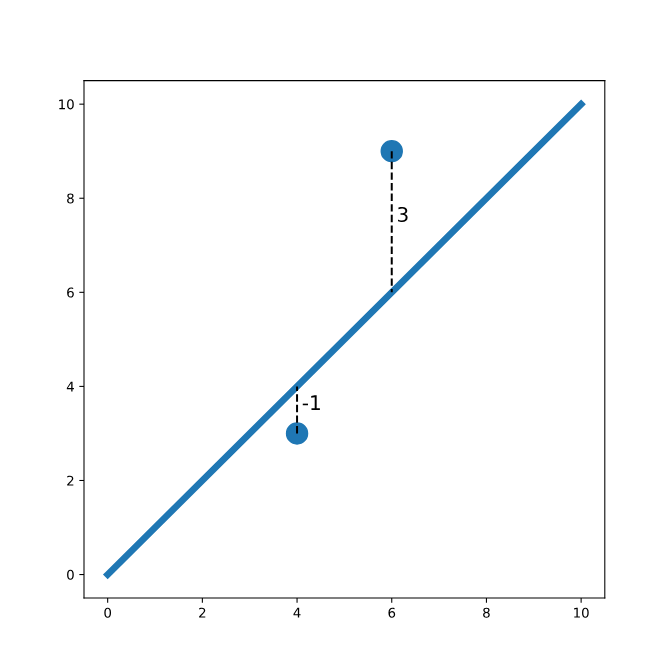 
In this plot, we see two points on either side of a line. One of the points is one unit below the line (labeled -1). The other point is three units above the line (labeled 3). The total squared error (loss) is: 
loss = (−1)² + (3)² = 1 + 9 = 10 
Notice that we square each individual distance so that points below and above the line contribute equally to loss (when we square a negative number, the result is positive). To find the best-fit line, we need to find the slope and intercept of the line that minimizes loss.

## Fitting a Linear Regression Model in Python
In Python, linear regression can be implemented with several libraries, but a convenient option is OLS.from_formula() from the statsmodels package, as it combines simple syntax with detailed model summaries. The formula syntax follows the structure outcome ~ predictor, where the variable before the tilde is the dependent variable and the variable after is the independent variable. For example, to predict weight from height in a dataset body_measurements, we write:

model = sm.OLS.from_formula('weight ~ height', data=body_measurements)

results = model.fit()

The coefficients can then be accessed with results.params, which return the fitted intercept and slope. 

In [5]:
import statsmodels.api as sm

# Create the model here:
model = sm.OLS.from_formula('score ~ hours_studied', data = students)
# Fit the model here:
results = model.fit()
# Print the coefficients here:
print(results.params)

Intercept        43.016014
hours_studied     9.848111
dtype: float64


## Using a Regression Model for Prediction¶

After fitting a linear regression, the model can be used to predict values of the outcome variable based on new inputs. The prediction is made by substituting the predictor values into the regression equation, which combines the slope and intercept. For example, with a slope of 0.50 and an intercept of 
−21.67, the model predicts weight from height using the equation 
weight= 0.50 ⋅ height − 21.67
By plugging in a height value, such as 160 cm, we obtain a predicted weight of 58.33 kg. These predictions can be computed directly from the coefficients or through built-in functions of the regression model, both yielding consistent results.

In [8]:
# Print the model parameters (intercept and slope), which define the regression line
print(results.params)

# Calculate and print `pred_3hr`: this uses the regression equation directly.
# We plug in x = 3 (hours studied) into the formula: intercept + slope * x
# This gives the predicted test score for someone who studied 3 hours.
x = 3
pred_3hr = results.params[0] + results.params[1] * x
print(pred_3hr)

# Calculate and print `pred_5hr`: this uses the built-in .predict() method.
# We create a small dataset with hours_studied = 5, and the model automatically applies
# the regression equation using the fitted parameters.
# This approach is more flexible when making predictions for one or multiple new values.
new_data = {"hours_studied": [5]}
pred_5hr = results.predict(new_data)[0]
print(pred_5hr)

Intercept        43.016014
hours_studied     9.848111
dtype: float64
72.56034698735526
92.25656916195145


/tmp/ipykernel_10313/3634684349.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_3hr = results.params[0] + results.params[1] * x


## Interpreting a Regression Model¶
The coefficients of a regression model—the intercept and the slope—describe how the predictor and outcome variables relate to one another. The intercept represents the expected value of the outcome when the predictor equals zero. Sometimes this has a practical meaning (e.g., predicting ice cream sales at 0°C), while in other cases it may be nonsensical (e.g., predicting the weight of a person at 0 cm height). The slope indicates how much the outcome changes for a one-unit change in the predictor, capturing both the magnitude and direction of the relationship. A positive slope means the outcome increases as the predictor increases, while a negative slope means it decreases. Thus, the slope provides the core interpretation of the relationship, while the intercept anchors the regression line within the data space.
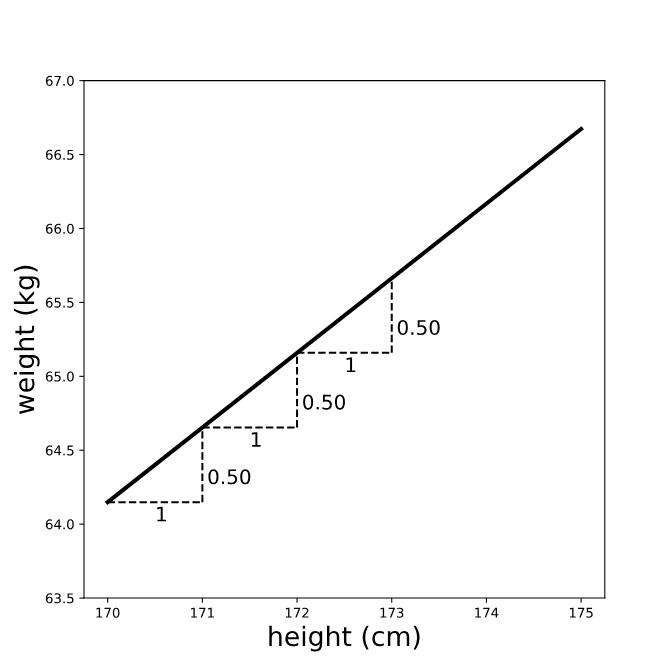
Remember that slope can be thought of as rise/run — the ratio between the vertical and horizontal distances between any two points on the line. Therefore, the slope (which we previously calculated to be 0.50 kg/cm) is the expected difference in the outcome variable (weight) for a one unit difference in the predictor variable (height). In other words, we expect that a one centimeter difference in height is associated with .5 additional kilograms of weight.

## Assumptions of Linear Regression Part 1
10 min
There are a number of assumptions of simple linear regression, which are important to check if you are fitting a linear model. The first assumption is that the relationship between the outcome variable and predictor is linear (can be described by a line). We can check this before fitting the regression by simply looking at a plot of the two variables.
The next two assumptions (normality and homoscedasticity) are easier to check after fitting the regression. We will learn more about these assumptions in the following exercises, but first, we need to calculate two things: fitted values and residuals.
Again consider our regression model to predict weight based on height (model formula 'weight ~ height'). The fitted values are the predicted weights for each person in the dataset that was used to fit the model, while the residuals are the differences between the predicted weight and the true weight for each person. Visually:
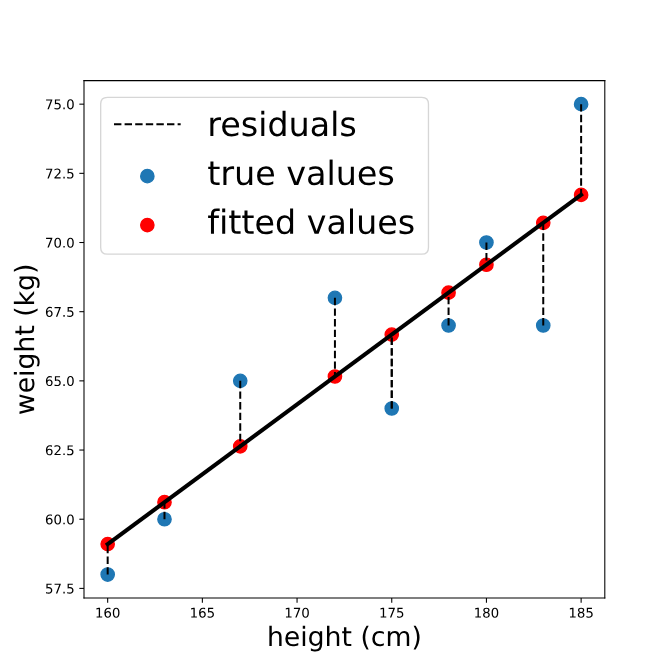

In [9]:
# Calculate `fitted_values` here:
# Fitted values represent the scores that the model expects based on the 
# regression line, using the estimated slope and intercept.
#They are basically the red points in the previous image
fitted_values = results.predict(students.hours_studied)

# Calculate `residuals` here:
# Residuals are the differences between the observed values (actual test scores)
# and the fitted values (predicted scores from the model).
residuals = students.score - fitted_values

# Print the first 5 residuals here:
print(residuals.head())

0     3.894086
1     8.806731
2   -12.236291
3     5.827009
4    10.096631
dtype: float64


## Assumptions of Linear Regression (Part 2)
Two key assumptions of linear regression concern the behavior of the residuals: normality and homoscedasticity. The normality assumption requires that residuals follow an approximately normal distribution, which can be checked with a histogram. A symmetric, single-peaked shape indicates that the assumption is satisfied, while skewness or multiple peaks suggest violations. The homoscedasticity assumption requires that residuals have constant variance across all predictor values. This is tested by plotting residuals against fitted values: if the points are randomly scattered around zero, the assumption holds. Patterns such as funnels or asymmetry indicate heteroscedasticity, which can bias regression results.

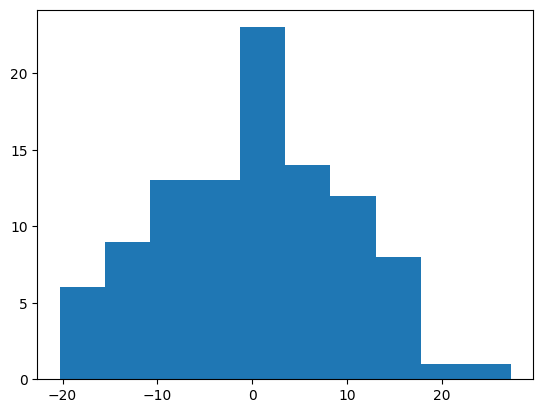

<Figure size 640x480 with 0 Axes>

In [10]:
# Plot a histogram of the residuals here
#This shows that the residuals are indeed normally distributed
plt.hist(residuals)
plt.show()
plt.clf()

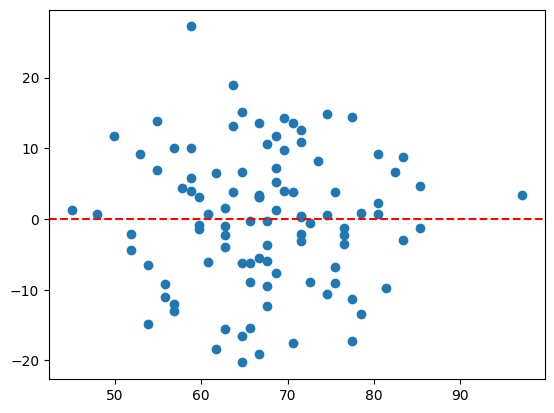

In [11]:
# Plot the residuals against the fitted values here:
# This plot helps us check the homoscedasticity assumption. If the assumption holds,
# residuals should appear as a random scatter around zero, without patterns or funnels.
plt.scatter(fitted_values, residuals)
# Add a horizontal line at y = 0 to serve as a visual reference.
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

## Categorical Predictors
Linear regression can also include categorical predictors, not just quantitative ones. The simplest case is a binary variable, coded as 0 or 1. For example, if we record whether someone eat breakfast (1 = yes, 0 = no) alongside their score, the regression will model the difference in average score between the two groups. The fitted line in this case passes through the group means: one point at the mean score of non-breakfast-eaters (0) and one point at the mean score of breakfast-eaters (1). Thus, the intercept represents the average outcome for the reference group (0), and the slope reflects the difference between the two categories. This shows how regression can capture categorical effects by comparing group averages.

In [12]:
# Calculate group means
mean_values = students.groupby('breakfast').mean().score
print(mean_values)

breakfast
0    61.664151
1    73.721277
Name: score, dtype: float64


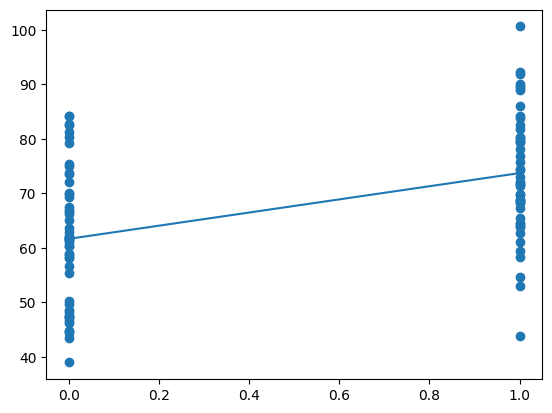

In [13]:
# Create the scatter plot here:
plt.scatter(students.breakfast, students.score)

# Add the additional line here:
plt.plot([0,1], [mean_values[0], mean_values[1]])

# Show the plot
plt.show()

## Categorical Predictors: Fit and Interpretation
When fitting a regression with a binary predictor, the model estimates the mean of the reference group (coded as 0) through the intercept and the difference between groups through the slope. For example, if height is predicted from basketball participation, the intercept corresponds to the average height of non-players, while the slope represents how much taller players are on average compared to non-players. If the variable is coded as 0/1, True/False, or even 'yes'/'no', the regression automatically interprets these categories, assigning one as the reference group. Thus, binary predictors in regression are interpreted as group mean comparisons, with the slope quantifying the difference between categories.

In [14]:
# Fit the model on the categorical values of tha x variable
# and print the coefficients
model = sm.OLS.from_formula('score ~ breakfast', students)
results = model.fit()
print(results.params)

Intercept    61.664151
breakfast    12.057126
dtype: float64


In [17]:
# Calculate and print group means
mean_score_no_breakfast = np.mean(students.score[students.breakfast == 0])
mean_score_breakfast = np.mean(students.score[students.breakfast == 1])
print('Mean score (no breakfast): ', mean_score_no_breakfast)
print('Mean score (breakfast): ', mean_score_breakfast)
# Calculate and print the difference in group means, which is exactly 
# the value of the slope
print('Difference in the mean values: ',mean_score_breakfast - mean_score_no_breakfast)

Mean score (no breakfast):  61.664150943396216
Mean score (breakfast):  73.72127659574468
Difference in the mean values:  12.057125652348468


In [ ]:
# Load libraries
import codecademylib3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
website = pd.read_csv('website.csv')

# Print the first five rows
print(website.head())

# Create a scatter plot of time vs age
plt.scatter(website.time_seconds, website.age)

# Show then clear plot
plt.show()
plt.clf()

# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ age', data = website)
results = model.fit()
print(results.param)